In [1]:
import emip_toolkit as EMTK
# from IPython.display import Image
import correction
import random 
import numpy as np
import PIL
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

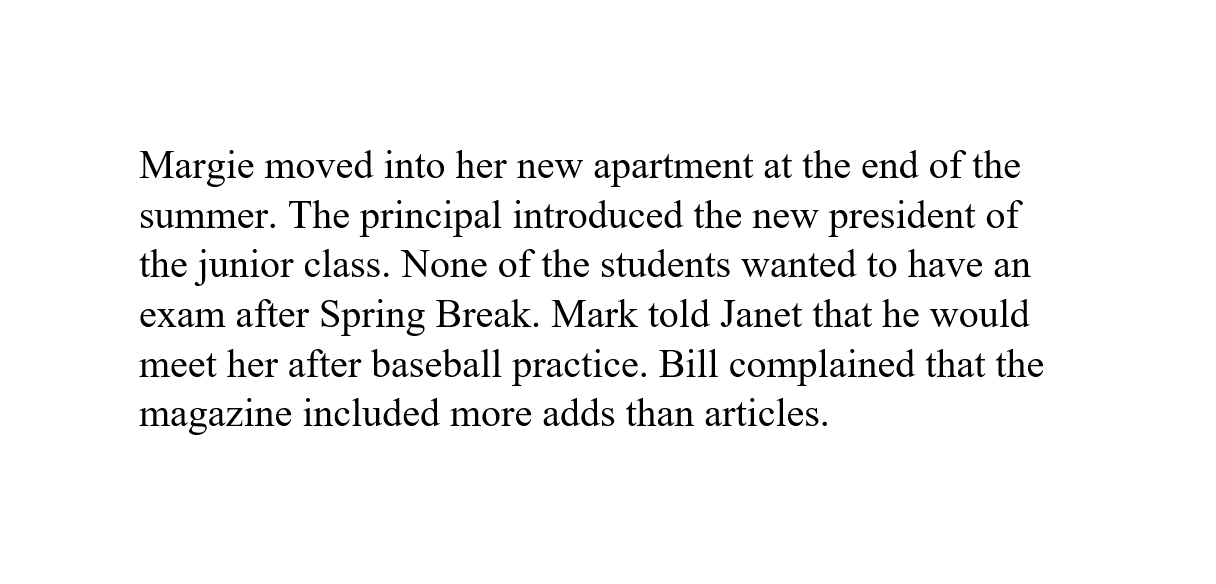

In [2]:
from IPython.display import Image
img = Image(filename= 'synthetic_text.png')
img

# New Section

In [3]:
image_path = ""
image = "synthetic_text.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi.head()

c:\Users\PC\Desktop\NN_with_Transfer_Learning\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\PC\Desktop\NN_with_Transfer_Learning\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\PC\Desktop\NN_with_Transfer_Learning\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\PC\Desktop\NN_with_Transfer_Learning\emip_toolkit.py:1255: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
c:\Users\PC\Desktop\NN_w

,kind,name,x,y,width,height,image
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png


In [4]:
file_path = ""
aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, image.split(".")[0]+".txt", aoi)
aois_with_tokens.head()

,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,137.5,147,119,44,synthetic_text.png,Margie
1,sub-line,line 1 part 2,262.5,147,114,44,synthetic_text.png,moved
2,sub-line,line 1 part 3,382.5,147,65,44,synthetic_text.png,into
3,sub-line,line 1 part 4,453.5,147,57,44,synthetic_text.png,her
4,sub-line,line 1 part 5,514.5,147,72,44,synthetic_text.png,new


In [5]:
line_ys = correction.find_lines_Y(aois_with_tokens)

In [6]:
x = 584
y = 1216
input_x = x//2
input_y = y//2
num_train = 200
num_test = 200

x_train = np.zeros((num_train, input_x, input_y, 3), dtype=np.uint16)
y_train = np.zeros(num_train, dtype=int)
x_test = np.zeros((num_test, input_x, input_y, 3), dtype=np.uint16)
y_test = np.zeros(num_test, dtype=int)

errors = [0, 1, 2, 3, 4]

In [7]:
# data = {}
# error_types = {}

for i in range(num_train):
    error_type = random.choice(errors)
    y_train[i] = error_type

    if error_type == 0: # noise
      synth_fixations = correction.generate_fixations_center(aois_with_tokens)
      error_trial = correction.error_noise(random.random(), random.randint(0, 50), random.random(), synth_fixations) 
    
    elif error_type == 1: # shift
      synth_fixations = correction.generate_fixations_center(aois_with_tokens)
      line_ys = np.array(synth_fixations)[:, 1]
      error_trial = correction.error_shift(random.random(), line_ys, synth_fixations) 
   
    elif error_type == 2: # droop
      synth_fixations = correction.generate_fixations_center(aois_with_tokens)
      error_trial = correction.error_droop(random.uniform(0,5), synth_fixations)  
    
    elif error_type == 3: # offset 
      synth_fixations = correction.generate_fixations_center(aois_with_tokens)
      error_trial = correction.error_offset(random.uniform(0,5), random.uniform(0,5), synth_fixations)  
    
    elif error_type == 4: # no error
      error_trial = correction.generate_fixations_center(aois_with_tokens)
    
    else: # wrong entry
      print("Error: wrong entry")
      break

    # data["reader" + str(i)] = error_trial 
    # error_types["reader" + str(i)] = error_type
    im = correction.fix_to_img('synthetic_text.png', error_trial)

    im_small = im.resize((input_y, input_x)) # shrink image to fit in model, shape defined in prev cell
    im_small_array = np.asarray(im_small)
    x_train[i] = im_small_array
    # plt.imshow(x_train[i])
    # print(x_train)


np.save("data/x_train.npy", x_train)
np.save("data/y_train.npy", y_train)

In [8]:
for i in range(num_test):
    error_type = random.choice(errors)
    y_test[i] = error_type

    if error_type == 0: # noise
      synth_fixations = correction.generate_fixations_center(aois_with_tokens)
      error_trial = correction.error_noise(random.random(), random.randint(0, 50), random.random(), synth_fixations) 
    
    elif error_type == 1: # shift
      synth_fixations = correction.generate_fixations_center(aois_with_tokens)
      line_ys = np.array(synth_fixations)[:, 1]
      error_trial = correction.error_shift(random.random(), line_ys, synth_fixations) 
   
    elif error_type == 2: # droop
      synth_fixations = correction.generate_fixations_center(aois_with_tokens)
      error_trial = correction.error_droop(random.uniform(0,5), synth_fixations)  
    
    elif error_type == 3: # offset 
      synth_fixations = correction.generate_fixations_center(aois_with_tokens)
      error_trial = correction.error_offset(random.uniform(0,5), random.uniform(0,5), synth_fixations)  
    
    elif error_type == 4: # no error
      error_trial = correction.generate_fixations_center(aois_with_tokens)
    
    else: # wrong entry
      print("Error: wrong entry")
      break
    
    # data["reader" + str(i)] = error_trial 
    # error_types["reader" + str(i)] = error_type
    im = correction.fix_to_img('synthetic_text.png', error_trial)

    im_small = im.resize((input_y, input_x)) # shrink image to fit in model, shape defined in prev cell
    im_small_array = np.asarray(im_small)
    x_test[i] = im_small_array
    # plt.imshow(x_test[i])
    # print(x_test)


np.save("data/x_test.npy", x_test)
np.save("data/y_test.npy", y_test)